<a href="https://colab.research.google.com/github/cwy20030/Machine-Learning-Workshop/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Digit Classification***

*** goo.gl/GRvxDv***
In this tutorial, we will learn how to do handwritten digits classification using scikit-learn. There are 10 classes and 1797 examples in total. Each example is an 8 * 8 image.

First we will import all the relevant packages.

In [0]:
from sklearn.datasets import load_digits,load_iris
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import matplotlib.pyplot as plt

Next we will load the dataset.

In [0]:
digits = load_digits()



Next we will split the dataset intro training and test data.

In [0]:
#X=[[],[],[],[]] Nxd d =5, N = 100
#Y = []
X_train = digits.data[:1000,:]
Y_train = digits.target[:1000]
X_Valid = digits.data[100:150,:]
Y_Valid = digits.target[100:150]
X_test = digits.data[1500:,:]
Y_test = digits.target[10:]
print(Y_train.shape,X_train.shape)

(100,) (100, 64)


Next we will instantiate a classifier and fit the training data. In this example we will use logistic regression classifier.

In [0]:
#model = linear_model.LogisticRegression(C=1e5)
#model = KNeighborsClassifier(n_neighbors = 3)#NearestNeighbors(n_neighbors=1)
model = tree.DecisionTreeClassifier(max_depth = None) #depths: 3,4,5
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Now we will randomly pick an image and visualize it. We will also check what the model predicts about the class of the image.

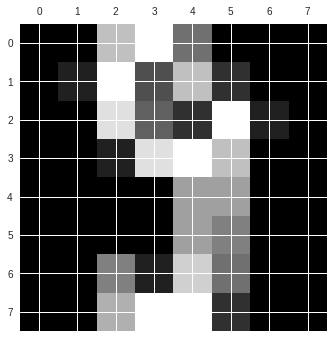

(8, 8)
Model's prediction: [9]


In [0]:
datapoint = 25
plt.gray() 
plt.matshow(X_test[datapoint].reshape(8,8)) 
plt.show()
#print("model's prediction: ",model.predict([X_train[datapoint,:]]))
print(digits.images[datapoint].shape)
#print("Nearest Neighbor:",model.kneighbors([X_test[datapoint,:]]))
print("Model's prediction:", model.predict([X_test[datapoint,:]]))
#print(Y_train[125],Y_train[59],Y_train[83])

Now we will print the accuracy of the classifer in predicting the class of training examples and test examples.

In [0]:
#Accuracy on training data
Y_pred = model.predict(X_test)
Y_pred_ = model.predict(X_train)
print("training accuracy :",accuracy_score(Y_train,Y_pred_))
#Accuracy on Test data
print("test accuracy :",accuracy_score(Y_test,Y_pred))
# 2: 30%
# 3: 36%
# 4: 41%
# 5: 50%
# None: 52%

training accuracy : 1.0
test accuracy : 0.5215543412264724


In [0]:
tree.export_graphviz(model,out_file='rules.out')

To Visualize the tree. Copy the contents of 'rules.out' and paste it in webgraphivz.com

In [0]:
f = open('rules.out')
fp = f.readlines()
print(fp)
for line in fp:
  print(line)

['digraph Tree {\n', 'node [shape=box] ;\n', '0 [label="X[13] <= 2.5\\ngini = 0.9\\nsamples = 150\\nvalue = [15, 15, 15, 15, 15, 15, 15, 15, 15, 15]"] ;\n', '1 [label="X[50] <= 0.5\\ngini = 0.656\\nsamples = 36\\nvalue = [0, 0, 4, 0, 15, 0, 14, 0, 0, 3]"] ;\n', '0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n', '2 [label="gini = 0.0\\nsamples = 15\\nvalue = [0, 0, 0, 0, 15, 0, 0, 0, 0, 0]"] ;\n', '1 -> 2 ;\n', '3 [label="X[20] <= 9.5\\ngini = 0.499\\nsamples = 21\\nvalue = [0, 0, 4, 0, 0, 0, 14, 0, 0, 3]"] ;\n', '1 -> 3 ;\n', '4 [label="gini = 0.0\\nsamples = 14\\nvalue = [0, 0, 0, 0, 0, 0, 14, 0, 0, 0]"] ;\n', '3 -> 4 ;\n', '5 [label="X[38] <= 0.5\\ngini = 0.49\\nsamples = 7\\nvalue = [0, 0, 4, 0, 0, 0, 0, 0, 0, 3]"] ;\n', '3 -> 5 ;\n', '6 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 0, 4, 0, 0, 0, 0, 0, 0, 0]"] ;\n', '5 -> 6 ;\n', '7 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 3]"] ;\n', '5 -> 7 ;\n', '8 [label="X[42] <= 3.5\\ngini = 0.876